In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

In [2]:
df =pd.read_csv('HomoSapiens_binary_hq.txt',sep='\t',usecols=['Uniprot_A','Uniprot_B'])

In [3]:
df

,Uniprot_A,Uniprot_B
0,A0A024QYV7,A0A024QYV7
1,A0A024QYV7,Q01844
2,A0A024QYV7,Q13838
3,A0A024QYV7,Q16543
4,A0A024QYV7,Q9UKW6
...,...,...
64394,V9HWA4,V9HWA4
64395,V9HWH6,V9HWH6
64396,V9HWJ5,V9HWJ5
64397,X5DNA9,X5DNA9


In [4]:
G=nx.from_pandas_edgelist(df,'Uniprot_A','Uniprot_B',create_using=nx.DiGraph())

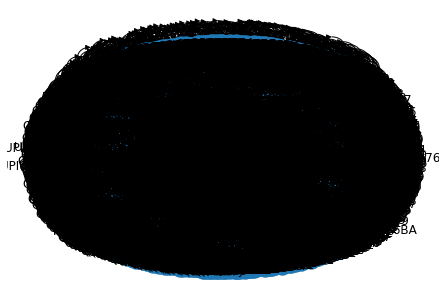

In [5]:
nx.draw(G,with_labels=True)

In [6]:
# visualize to each protein and its degree
degrees=dict(G.degree)
order=sorted(degrees.items(),key=lambda t :t[1])

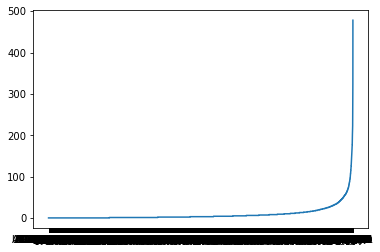

In [7]:
x,y=zip(*order)
plt.plot(x,y)
plt.show()

<BarContainer object of 478 artists>

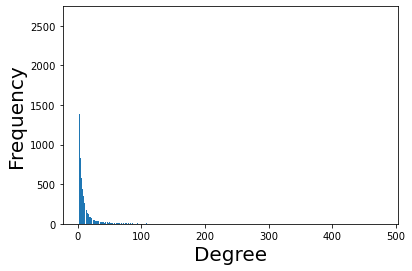

In [8]:
# frequency for Degrees of proteins
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [9]:
# Degree Distribution to know hubs (little proteins have high Degree)

def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
   
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "b+")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()  

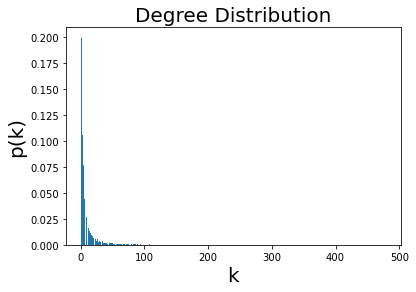

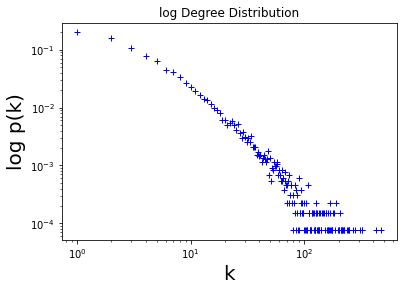

In [10]:
plot_degree_dist(G)

In [11]:
# 5% from sorted degree (hubs)
len(order)*5/100

655.05

In [12]:
hubs=[]
for i in range(len(order)-1,len(order)-80,-1):
    hubs.append(order[i][0])

In [13]:
hubs

['P08238',
 'P62993',
 'Q08379',
 'Q6A162',
 'P12004',
 'P60369',
 'P54253',
 'P14373',
 'Q99750',
 'Q7Z3S9',
 'P04637',
 'Q8IUH5',
 'O60341',
 'P60409',
 'Q12933',
 'Q93062',
 'O43889',
 'P46108',
 'P63279',
 'P50222',
 'P00533',
 'P54274',
 'Q16543',
 'P09429',
 'Q16659',
 'Q04864',
 'Q5JR59',
 'P16333',
 'Q15323',
 'P06241',
 'Q9BRK4',
 'P04183',
 'Q9NRR5',
 'P0CG48',
 'P00519',
 'P19320',
 'Q9NUX5',
 'P04626',
 'P60411',
 'Q92731',
 'P60410',
 'Q01844',
 'P36897',
 'Q8TBB1',
 'P61981',
 'Q13077',
 'P15884',
 'Q96BE0',
 'Q13137',
 'P27986',
 'Q15834',
 'P38936',
 'Q08117',
 'O00560',
 'P84022',
 'Q8NHQ1',
 'P31749',
 'P68104',
 'Q09472',
 'P12931',
 'Q15796',
 'Q13485',
 'P67870',
 'Q9UMX0',
 'P25788',
 'Q9NYB0',
 'P49841',
 'Q5T3J3',
 'Q8N6Y0',
 'P36406',
 'Q15797',
 'Q9BYV2',
 'Q16637',
 'P63104',
 'O15198',
 'P08670',
 'P42858',
 'Q8ND90',
 'O15162']